<a href="https://colab.research.google.com/github/electrojam/Curso-de-Python-para-Ciencia-de-Datos/blob/main/Clase29_30_31_Caso_de_Estudio_(Parte_I)_Limpieza_de_datos29_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

In [24]:
file_path = 'https://raw.githubusercontent.com/databricks/Spark-The-Definitive-Guide/refs/heads/master/data/retail-data/all/online-retail-dataset.csv'
data = pd.read_csv(file_path)

# Limpieza de datos

In [25]:
# Imprimir información preliminar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [26]:
# Imprimir primeros 5 registros
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [27]:
# Describimos el df
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [28]:
# Datos faltantes pero suma total
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [29]:
# Datos duplicados pero la suma total
data.duplicated().sum()

5268

In [30]:
# Contar datos únicos de todas las columnas del df
unique_values = {col: data[col].unique() for col in data.columns}

for col, values in unique_values.items():
  print(f"Columna: {col}")
  print(f"Número de valores únicos: {len(values)}")
  print(f"Valores únicos: {values[:10]}")
  print("-" * 50)

Columna: InvoiceNo
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna: StockCode
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna: Description
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna: Quantity
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4 24 12 48 18]
-------------------------------------------------

In [31]:
# Eliminar filas duplicadas
data_cleaned = data.drop_duplicates()
# Eliminar filas con valores nulos en CustomerID
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [32]:
data_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [33]:
data_cleaned.duplicated().sum()

0

# Creación de Columnas

In [34]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
# Nueva columna TotalAmount = Quantity*UnitPrice
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [37]:
# Convertimos InvoiceDate de objetct a formato datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [39]:
#  Creamos nueva columna year y columna month
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [40]:
# Creamos df ventas por año
# agrupando por columna años y sumando todos los valores de TotalAmmount
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

,TotalAmount
Year,
2010,552372.860
2011,7726146.564


In [41]:
# Creamos columna Semester
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x<=6 else 2)

In [43]:
# creamos df ventas por semestre
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

# Graficación y análisis de resultados

In [63]:
# Contar número de transacciones que han tenido devolución, es decir Quantity < 0
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
print(total_returns)

8872


In [65]:
# Contar número de transacciones que no han tenido devolución, es decir Quantity > 0
total_no_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
print(total_no_returns)

392732


In [66]:
# Grafica de pastel
import matplotlib.pyplot as plt

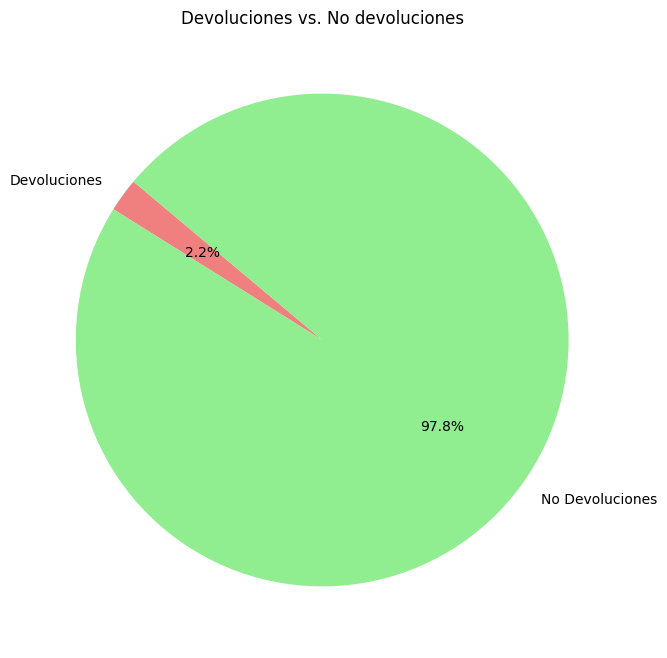

In [69]:
# Grafica de pastel

# labels
labels = ['Devoluciones', 'No Devoluciones']
sizes = [total_returns, total_no_returns]
colors = ['lightcoral', 'lightgreen']

# Configuramos el gráfico
plt.figure(figsize=(8,8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

# Etiquetar diagrama
plt.title('Devoluciones vs. No devoluciones')

# Mostramos el diagrama
plt.show()

In [71]:
# Creamos nueva Columna categórica low, medium, high
# dependiendo de columna TotalAmount

# Función categorizar cantidad, low, medium, high
def categorize_total_amount(amount):
  if amount < 20:
    return 'Low'
  elif 20 <= amount < 100:
    return 'Medium'
  else:
    return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Semester AmountCategory  
0  2010     12         2            Low  
1  2010     12      

In [72]:
# Contar número de transacciones que han tenido low, es decir AmountCategory == Low
total_low = data_cleaned[data_cleaned['AmountCategory'] == "Low"].shape[0]
print(total_low)

315319


In [73]:
# Contar número de transacciones que han tenido medium, es decir AmountCategory == Medium
total_medium = data_cleaned[data_cleaned['AmountCategory'] == "Medium"].shape[0]
print(total_medium)

74616


In [75]:
# Contar número de transacciones que han tenido low, es decir AmountCategory == 0
total_high = data_cleaned[data_cleaned['AmountCategory'] == "High"].shape[0]
print(total_high)

11669


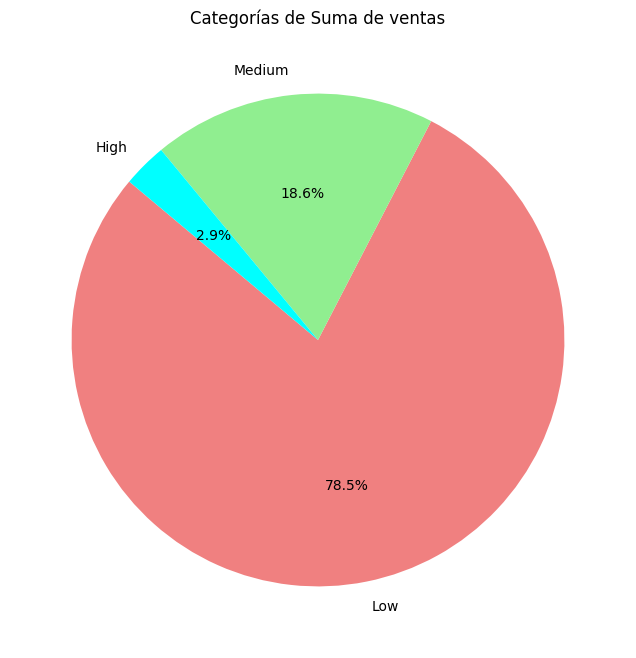

In [81]:
# Gráfico Pastel

labels = ['Low', 'Medium', 'High']
sizes = [total_low, total_medium, total_high]
colors = ['lightcoral', 'lightgreen', 'cyan']

# Configurar el tamaño de la figura
plt.figure(figsize=(8,8))
plt.pie(sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)

# Etiquetar diagrama
plt.title('Categorías de Suma de ventas')

# Mostramos el diagrama
plt.show()



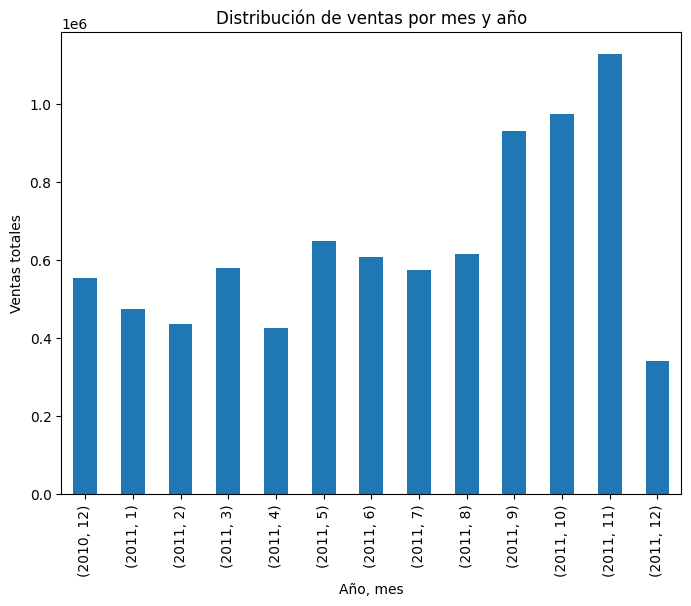

In [84]:
# Graficar Histograma distribución de ventas por mes y año

plt.figure(figsize=(8,6))

# Creamos el gráfico
data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum().plot(kind='bar')
plt.title('Distribución de ventas por mes y año')
plt.xlabel('Año, mes')
plt.ylabel('Ventas totales')
plt.show()

In [86]:
# Graficar productos Top10 más vendidos por cantidad
top_products = data_cleaned.groupby(['StockCode'])['Quantity'].sum().sort_values(ascending=False).head(10)
#Reseteamos los índices
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

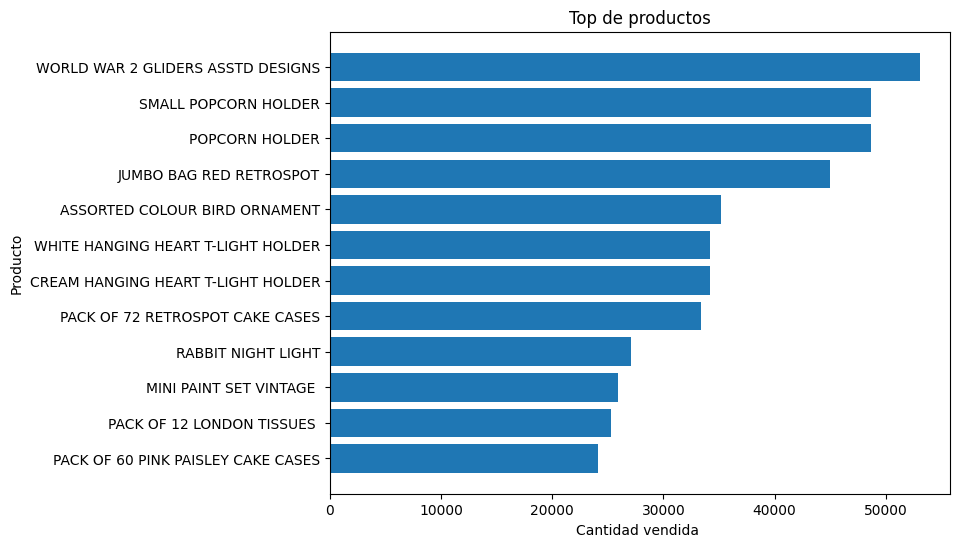

In [88]:
plt.figure(figsize=(8,6))
plt.barh(top_products['Description'], top_products['Quantity'] )
plt.title('Top de productos')
plt.xlabel('Cantidad vendida ')
plt.ylabel('Producto')
plt.gca().invert_yaxis()

plt.show()